In this notebook, I did a pre-selection of sources to whom I will fit their apparent proper motions.

The criterion are

- #sessions > 10  
- length of observing time span (dt) > 10 yr

In [1]:
from astropy.table import Table, setdiff
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
%matplotlib inline

from read_ts import get_sou_ts

In [2]:
sou = Table.read("../data/sou_list.txt", format="ascii")

# A special check on the ICRF3 defining sources
def_sou = Table.read("../data/icrf3sx-def-sou.txt", format="ascii")

nses = []
dt = []
def_nses = []
def_dt = []

for soui in sou["iers_name"]:
    ts = get_sou_ts(soui, "../data/ts")
    
    # Number of sessions
    N = len(ts)
    
    # length of observing time span
    dti = ts["mjy"].max() - ts["mjy"].min()
    
    # All group
    nses.append(N)
    dt.append(dti)
    
    # Defining source group
    if soui in def_sou["iers_name"]:
        def_nses.append(N)
        def_dt.append(dti)
    
nses = np.array(nses)
dt = np.array(dt)
def_nses = np.array(def_nses)
def_dt = np.array(def_dt)

Then plot the distribution of number of sessions.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


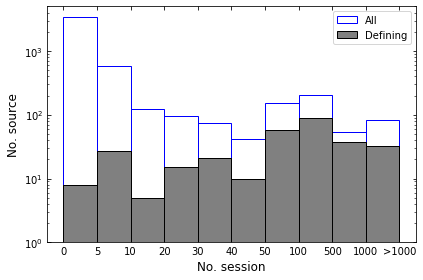

In [3]:
bins = [0, 5, 10, 20, 30, 40, 50, 100, 500, 1000, 1e8]
num, loc = np.histogram(nses, bins=bins)
def_num, def_loc = np.histogram(def_nses, bins=bins)

loclabel = []
for loci in loc[:-1]:
    loclabel.append("%.0f" % loci)

loclabel.append(">1000")
    
# Plot the histogram of No. session.
fig, ax = plt.subplots()

xloc = np.arange(len(num))
ax.bar(xloc, num, fill=False, align="edge", edgecolor="b", label="All",
       width=1)
ax.bar(xloc, def_num, color="grey", align="edge", edgecolor="k", label="Defining",
       width=1)

ax.set_xticks(np.arange(len(num)+1))
ax.set_xticklabels(loclabel)
ax.set_yscale("log")
ax.set_ylim([1, 5000])
ax.set_xlabel("No. session", fontsize=12)
ax.set_ylabel("No. source", fontsize=12)
ax.legend()

plt.tight_layout()
plt.savefig("../plots/no_sess.eps")

In [4]:
print("The min and max number of sessions for all sources are ", 
      np.min(nses), "and", np.max(nses))
print("The min and max number of sessions for defining sources are ", 
      np.min(def_nses), "and", np.max(def_nses))

The min and max number of sessions for all sources are  1 and 4770
The min and max number of sessions for defining sources are  3 and 4770


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


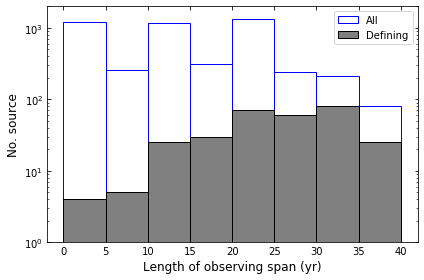

In [5]:
bins = np.arange(0, 41, 5)
num, loc = np.histogram(dt, bins=bins)
def_num, def_loc = np.histogram(def_dt, bins=bins)

loclabel = []
for loci in loc:
    loclabel.append("%.0f" % loci)

# Plot the histogram of No. session.
fig, ax = plt.subplots()

# xloc = np.arange(len(num))
ax.hist(dt, bins=bins, histtype="bar", edgecolor="b", label="All", fill=False)
ax.hist(def_dt, bins=bins, histtype="bar", color="grey", edgecolor="k", label="Defining")

ax.set_yscale("log")
ax.set_xlabel("Length of observing span (yr)", fontsize=12)
ax.set_ylabel("No. source", fontsize=12)
ax.set_ylim([1, 2000])
ax.legend()

plt.tight_layout()
plt.savefig("../plots/len_obs_time.eps")

In [6]:
print("The shortest and longest observing time span for all sources are ", 
      np.trunc(np.min(dt), 2), "yr and", np.max(dt), "yr")
print("The shortest and longest observing time span for defining sources are ", 
      np.min(def_dt), "yr and", np.max(def_dt), "yr")

The shortest and longest observing time span for all sources are  0.0 yr and 40.47166872005482 yr
The shortest and longest observing time span for defining sources are  2.403099247091177 yr and 40.4276878850103 yr


In [7]:
soulong = sou[(nses>10) & (dt>10)]

print("We get", len(soulong), "sources to fitting the apparent proper motions.")

soulong.write("../data/sou_list_longhist.txt", format="ascii", overwrite=True)

We get 800 sources to fitting the apparent proper motions.
